In [0]:
#!unzip air-pollution-in-seoul.zip

In [62]:
import pandas as pd
import numpy as np
import pickle
from sklearn.externals import joblib 
% matplotlib inline
import matplotlib.pyplot as plt
from google.colab import drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [63]:
data = pd.read_csv('/content/drive/My Drive/Dataset/Measurement_summary.csv')
data.head(10)

,Measurement date,Station code,Address,Latitude,Longitude,SO2,NO2,O3,CO,PM10,PM2.5
0,2017-01-01 00:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.004,0.059,0.002,1.2,73.0,57.0
1,2017-01-01 01:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.004,0.058,0.002,1.2,71.0,59.0
2,2017-01-01 02:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.004,0.056,0.002,1.2,70.0,59.0
3,2017-01-01 03:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.004,0.056,0.002,1.2,70.0,58.0
4,2017-01-01 04:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.003,0.051,0.002,1.2,69.0,61.0
5,2017-01-01 05:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.003,0.046,0.002,1.1,70.0,61.0
6,2017-01-01 06:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.003,0.049,0.002,1.1,66.0,57.0
7,2017-01-01 07:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.003,0.045,0.002,1.0,71.0,60.0
8,2017-01-01 08:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.004,0.047,0.002,1.1,72.0,60.0
9,2017-01-01 09:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.003,0.047,0.002,1.1,74.0,63.0


In [64]:
# Retriving data for station code 103 for PM2.5
data_103=data[(data['Station code']==103) & (data['PM2.5']>0)]
print(len(data_103))
print(data_103.head(10))

25575
       Measurement date  Station code  ...  PM10  PM2.5
51810  2017-01-01 00:00           103  ...  70.0   68.0
51811  2017-01-01 01:00           103  ...  73.0   66.0
51812  2017-01-01 02:00           103  ...  67.0   65.0
51813  2017-01-01 03:00           103  ...  68.0   65.0
51814  2017-01-01 04:00           103  ...  65.0   61.0
51815  2017-01-01 05:00           103  ...  62.0   59.0
51816  2017-01-01 06:00           103  ...  66.0   61.0
51817  2017-01-01 07:00           103  ...  65.0   58.0
51818  2017-01-01 08:00           103  ...  67.0   69.0
51819  2017-01-01 09:00           103  ...  70.0   74.0

[10 rows x 11 columns]


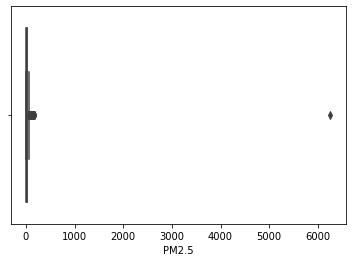

In [65]:
import seaborn as sns
sns.boxplot(data_103['PM2.5'])

25560


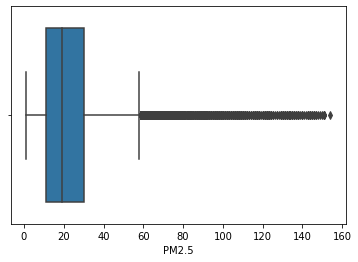

In [66]:
from scipy import stats
z = np.abs(stats.zscore(data_103['PM2.5']))
threshold = 3
#print(len(np.where(z > 3)))
data_103_Rout = data_103[(z < 3)]
print(len(data_103_Rout))
sns.boxplot(data_103_Rout['PM2.5'])

In [67]:
df=data_103_Rout['PM2.5']
df=df.values
df=df.reshape(df.shape[0],1)
print(df.shape)

(25560, 1)


In [68]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
df_scaled = min_max_scaler.fit_transform(df)
print(min(df),max(df))
list_=[]
for i in range (0,df_scaled.shape[0]):
  list_.append(df_scaled[i][0])
print(len(list_))
print(min(list_),max(list_))


[1.] [154.]
25560
0.0 1.0


In [69]:
window_size=5
y=[]
for i in range (0,len(list_)-window_size):
  x=list_[i:i+window_size]
  y.append(x)
print(len(y),y[0])


25555 [0.4379084967320262, 0.4248366013071896, 0.41830065359477125, 0.41830065359477125, 0.3921568627450981]


In [70]:
matrix=np.matrix(y)
print(matrix.shape)
new_data = pd.DataFrame(matrix,columns=['x1','x2','x3','x4','y'])
new_data.head(10)


(25555, 5)


,x1,x2,x3,x4,y
0,0.437908,0.424837,0.418301,0.418301,0.392157
1,0.424837,0.418301,0.418301,0.392157,0.379085
2,0.418301,0.418301,0.392157,0.379085,0.392157
3,0.418301,0.392157,0.379085,0.392157,0.372549
4,0.392157,0.379085,0.392157,0.372549,0.444444
5,0.379085,0.392157,0.372549,0.444444,0.477124
6,0.392157,0.372549,0.444444,0.477124,0.431373
7,0.372549,0.444444,0.477124,0.431373,0.503268
8,0.444444,0.477124,0.431373,0.503268,0.542484
9,0.477124,0.431373,0.503268,0.542484,0.522876


In [71]:
print(matrix[:,4])

[[0.39215686]
 [0.37908497]
 [0.39215686]
 ...
 [0.07189542]
 [0.08496732]
 [0.09150327]]


In [72]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
X_train, X_test, y_train, y_test = train_test_split(matrix[:,0:4],matrix[:,4],test_size=0.33, random_state=42)
lm =linear_model.LinearRegression()
model = lm.fit(X_train,y_train)
prediction=model.predict(X_test)
joblib.dump(model,'linear_regressor_Rout.pkl')
from google.colab import files
files.download('linear_regressor_Rout.pkl')
print(prediction.shape,prediction[0:5])

(8434, 1) [[0.06926808]
 [0.16978531]
 [0.40939859]
 [0.11863842]
 [0.08205675]]


In [73]:
print(model.score(X_train,y_train))
print(model.intercept_)
print(model.coef_)

0.9256913454906945
[0.00580738]
[[ 0.05783551 -0.08547976  0.04939247  0.93778467]]


In [74]:
print('mean squared eror : ',mean_squared_error(y_test,prediction))
from sklearn.metrics import mean_absolute_error
print('absolute mean error : ', mean_absolute_error(y_test,prediction))
print(r2_score(y_test,prediction))

mean squared eror :  0.0011133029560742903
absolute mean error :  0.021590658162510965
0.9292013558372737


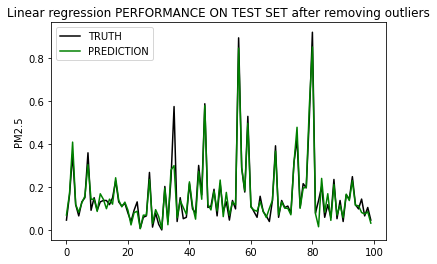

In [75]:
plt.plot(y_test[0:100], color = 'black', label = 'TRUTH')
plt.plot(prediction[0:100], color = 'green', label = 'PREDICTION')
plt.title('Linear regression PERFORMANCE ON TEST SET after removing outliers')
plt.ylabel('PM2.5')
plt.legend()
plt.show()

(25575, 1)
[1.] [6256.]
25575
0.0 1.0
25570 [0.010711430855315748, 0.010391686650679457, 0.010231814548361312, 0.010231814548361312, 0.00959232613908873]
(8439, 1) [[0.00357984]
 [0.00496241]
 [0.002782  ]
 [0.00372047]
 [0.01175123]]
mean squared eror :  0.00010179745867279589
absolute mean error :  0.0006516410687811663
-9.32275457604773


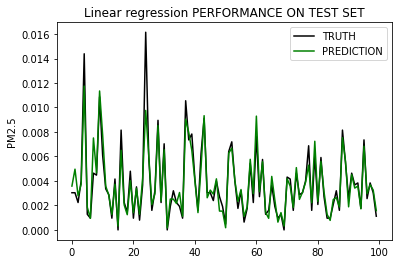

In [76]:
# IMPLEMENTING LINEAR REGRESSION WITHOUT REMOVING OUTLIERS
df=data_103['PM2.5']
df=df.values
df=df.reshape(df.shape[0],1)
print(df.shape)
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
df_scaled = min_max_scaler.fit_transform(df)
print(min(df),max(df))
list_=[]
for i in range (0,df_scaled.shape[0]):
  list_.append(df_scaled[i][0])
print(len(list_))
print(min(list_),max(list_))
window_size=5
y=[]
for i in range (0,len(list_)-window_size):
  x=list_[i:i+window_size]
  y.append(x)
print(len(y),y[0])
matrix= np.matrix(y)
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
X_train, X_test, y_train, y_test = train_test_split(matrix[:,0:4],matrix[:,4],test_size=0.33, random_state=42)
lm =linear_model.LinearRegression()
model = lm.fit(X_train,y_train)
prediction=model.predict(X_test)
joblib.dump(model,'linear_regressor.pkl')
from google.colab import files
files.download('linear_regressor.pkl')
print(prediction.shape,prediction[0:5])
print('mean squared eror : ',mean_squared_error(y_test,prediction))
from sklearn.metrics import mean_absolute_error
print('absolute mean error : ', mean_absolute_error(y_test,prediction))
print(r2_score(y_test,prediction))
plt.plot(y_test[0:100], color = 'black', label = 'TRUTH')
plt.plot(prediction[0:100], color = 'green', label = 'PREDICTION')
plt.title('Linear regression PERFORMANCE ON TEST SET')
plt.ylabel('PM2.5')
plt.legend()
plt.show()

In [77]:
# BAYESIAN RIDGE REGRESSION
from sklearn import linear_model
from statsmodels.tsa.ar_model import AR
model = linear_model.BayesianRidge()

model.fit(X_train,y_train )
prediction=model.predict(X_test)
joblib.dump(model,'bayesian_regressor.pkl')
from google.colab import files
files.download('bayesian_regressor.pkl')
print('mean squared eror : ',mean_squared_error(y_test,prediction))
from sklearn.metrics import mean_absolute_error
print('absolute mean error : ', mean_absolute_error(y_test,prediction))

print(r2_score(y_test,prediction))

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


mean squared eror :  9.770481854986684e-05
absolute mean error :  0.0006518216891234605
-8.907741076615721


In [78]:
# IMLEMENTING  RANDOM FOREST ALGORITHM
from sklearn.ensemble import RandomForestRegressor
model= RandomForestRegressor(max_depth=8, random_state=0)
model.fit(X_train,y_train)
prediction=model.predict(X_test)
joblib.dump(model,'randomforest_regressor.pkl')
print('mean squared eror : ',mean_squared_error(y_test,prediction))
from sklearn.metrics import mean_absolute_error
print('absolute mean error : ', mean_absolute_error(y_test,prediction))
print(r2_score(y_test,prediction))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


mean squared eror :  7.438171588412069e-06
absolute mean error :  0.0005839402852125652
0.24573343182850937


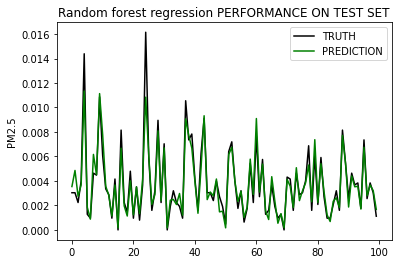

truth :  [[0.00303757]
 [0.00303757]
 [0.00223821]
 [0.0039968 ]
 [0.01438849]
 [0.00127898]
 [0.00095923]
 [0.00463629]
 [0.00447642]
 [0.0108713 ]]
prediction :  [0.0035421  0.00485807 0.00274389 0.00366996 0.01133787 0.00184644
 0.00088016 0.00616791 0.00450727 0.01113456]


In [79]:
plt.plot(y_test[0:100], color = 'black', label = 'TRUTH')
plt.plot(prediction[0:100], color = 'green', label = 'PREDICTION')
plt.title('Random forest regression PERFORMANCE ON TEST SET')
plt.ylabel('PM2.5')
plt.legend()
plt.show()
print('truth : ',y_test[0:10])
print('prediction : ',prediction[0:10])

In [80]:
# RIDGE REGRESSION
from sklearn.linear_model import Ridge
model = Ridge(alpha=1.0)
model.fit(X_train,y_train)
prediction=model.predict(X_test)
joblib.dump(model,'ridge_regressor.pkl')
from google.colab import files
files.download('ridge_regressor.pkl')
print(mean_squared_error(y_test,prediction))
print(mean_absolute_error(y_test,prediction))
print(r2_score(y_test,prediction))


8.236679124115283e-06
0.0015692475789769876
0.16476090632879636


In [81]:
# IMPLEMENTING SUPPORT VECTOR
from sklearn.svm import LinearSVR
model= LinearSVR()
model.fit(X_train,y_train)
prediction=model.predict(X_test)
print('mean squared eror : ',mean_squared_error(y_test,prediction))
from sklearn.metrics import mean_absolute_error
print('absolute mean error : ', mean_absolute_error(y_test,prediction))
print(r2_score(y_test,prediction))

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


mean squared eror :  8.918303601787742e-05
absolute mean error :  0.0008455706666414488
-8.043591118698492


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


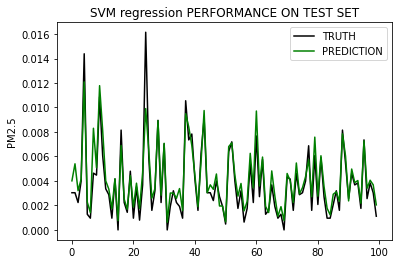

In [82]:
plt.plot(y_test[0:100], color = 'black', label = 'TRUTH')
plt.plot(prediction[0:100], color = 'green', label = 'PREDICTION')
plt.title('SVM regression PERFORMANCE ON TEST SET')
plt.ylabel('PM2.5')
plt.legend()
plt.show()

In [83]:
# IMPLEMENTING A NEURAL NETWORK
from sklearn.preprocessing import StandardScaler
#sc = StandardScaler()
#X = sc.fit_transform(X)
import keras
from keras.models import Sequential
from keras.layers import Dense
# Neural network
model = Sequential()
model.add(Dense(64, input_dim=4, activation='relu'))
model.add(Dense(128, input_dim=4, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(1, activation='relu'))


model.compile(optimizer = "adam", loss ='mse', 
          metrics =["accuracy"])
history = model.fit(X_train, y_train, epochs=100, batch_size=32)

Epoch 1/100
17131/17131 [==============================] - 2s 127us/step - loss: 8.1303e-05 - accuracy: 0.0228
Epoch 2/100
17131/17131 [==============================] - 2s 120us/step - loss: 8.1117e-05 - accuracy: 0.0228
Epoch 3/100
17131/17131 [==============================] - 2s 119us/step - loss: 8.1117e-05 - accuracy: 0.0228
Epoch 4/100
17131/17131 [==============================] - 2s 120us/step - loss: 8.1117e-05 - accuracy: 0.0228
Epoch 5/100
17131/17131 [==============================] - 2s 118us/step - loss: 8.1117e-05 - accuracy: 0.0228
Epoch 6/100
17131/17131 [==============================] - 2s 120us/step - loss: 8.1117e-05 - accuracy: 0.0228
Epoch 7/100
17131/17131 [==============================] - 2s 119us/step - loss: 8.1117e-05 - accuracy: 0.0228
Epoch 8/100
17131/17131 [==============================] - 2s 119us/step - loss: 8.1117e-05 - accuracy: 0.0228
Epoch 9/100
17131/17131 [==============================] - 2s 118us/step - loss: 8.1117e-05 - accuracy: 0.0228
E

dict_keys(['loss', 'accuracy'])


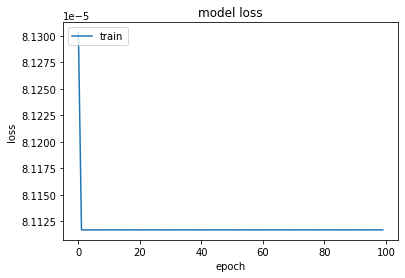

mean squared error :  2.2909124316691822e-05
mean absolute error :  0.0008455706666414488
-8.043591118698492


In [84]:
print(history.history.keys())
# "Loss"
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()
y_pred = model.predict(X_test)
print('mean squared error : ',mean_squared_error(y_test,y_pred))
print('mean absolute error : ',mean_absolute_error(y_test,prediction))
print(r2_score(y_test,prediction))
#Converting predictions to label


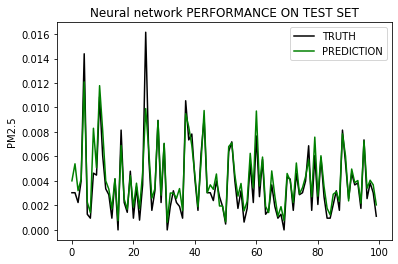

In [85]:
plt.plot(y_test[0:100], color = 'black', label = 'TRUTH')
plt.plot(prediction[0:100], color = 'green', label = 'PREDICTION')
plt.title('Neural network PERFORMANCE ON TEST SET')
plt.ylabel('PM2.5')
plt.legend()
plt.show()

In [86]:
print(X_train)
X_train=np.asarray(X_train)
X_test=np.asarray(X_test)
y_train=np.asarray(y_train)
y_test=np.asarray(y_test)

print(X_train.shape)
X_train=X_train.reshape(X_train.shape[0],X_train.shape[1],1)
print(X_train.shape)

[[0.0028777  0.00255795 0.00239808 0.00207834]
 [0.00383693 0.00415667 0.00351719 0.00319744]
 [0.0028777  0.0028777  0.00255795 0.00223821]
 ...
 [0.00607514 0.00511591 0.00479616 0.00447642]
 [0.00495604 0.00431655 0.00463629 0.00495604]
 [0.00143885 0.00127898 0.00175859 0.00143885]]
(17131, 4)
(17131, 4, 1)


In [87]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
regressor = Sequential()

regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
#regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
#regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
#regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50))
#regressor.add(Dropout(0.2))

regressor.add(Dense(units = 1))

regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

history = regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
17131/17131 [==============================] - 27s 2ms/step - loss: 6.9564e-05
Epoch 2/100
17131/17131 [==============================] - 26s 2ms/step - loss: 6.8700e-05
Epoch 3/100
17131/17131 [==============================] - 26s 2ms/step - loss: 6.8704e-05
Epoch 4/100
17131/17131 [==============================] - 26s 2ms/step - loss: 6.7310e-05
Epoch 5/100
17131/17131 [==============================] - 26s 2ms/step - loss: 6.4606e-05
Epoch 6/100
17131/17131 [==============================] - 26s 2ms/step - loss: 6.6677e-05
Epoch 7/100
17131/17131 [==============================] - 26s 2ms/step - loss: 6.3833e-05
Epoch 8/100
17131/17131 [==============================] - 26s 2ms/step - loss: 6.1804e-05
Epoch 9/100
17131/17131 [==============================] - 26s 2ms/step - loss: 6.1704e-05
Epoch 10/100
17131/17131 [==============================] - 26s 2ms/step - loss: 6.1219e-05
Epoch 11/100
17131/17131 [==============================] - 26s 2ms/step - loss: 6.1337e-

dict_keys(['loss'])


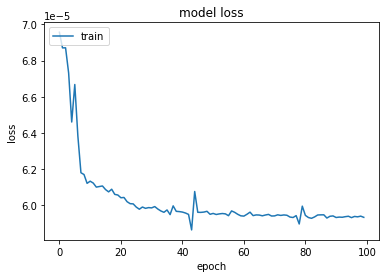

mean square error : 2.4525064032018986e-06
mean absolute error :  0.0005584565993235283
0.7513039910179574


In [88]:
print(history.history.keys())
# "Loss"
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()
X_test=X_test.reshape(X_test.shape[0],X_test.shape[1],1)
prediction = regressor.predict(X_test)
print("mean square error :" ,mean_squared_error(y_test,prediction))
from sklearn.metrics import mean_absolute_error
print("mean absolute error : ",mean_absolute_error(y_test,prediction))
print(r2_score(y_test,prediction))

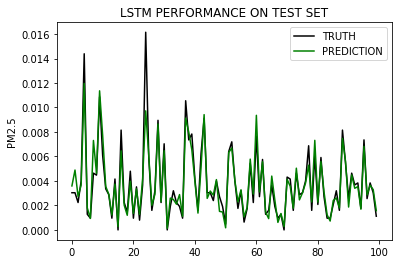

In [89]:
plt.plot(y_test[0:100], color = 'black', label = 'TRUTH')
plt.plot(prediction[0:100], color = 'green', label = 'PREDICTION')
plt.title('LSTM PERFORMANCE ON TEST SET')
plt.ylabel('PM2.5')
plt.legend()
plt.show()